## Data Mining and Text Analysis Assessment 

In [1]:
#importing the modules I will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import geopandas as gpd
import math
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the training set (keeping test set seperate for validation) 
#and setting the unanmed first column as the index
data = pd.read_csv("data/fraudTrain.csv", index_col=0)
data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [3]:
#looking at the data - seeing types and checking for null values etc
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [4]:
#seeing if there are any duplicate rows
data.duplicated().sum() #for nonduplicates do (~df.duplicated()).sum()

0

In [5]:
#ratio of observations / variables
#know this from above but checking as important to have a lot more observations than variables
obs = len(data)
print(f'Number of observations = {obs}')
varis = len(data.columns)
print(f'Number of variables = {varis}')

print(f'Ratio of observations to variables = {varis/obs}')

Number of observations = 1296675
Number of variables = 22
Ratio of observations to variables = 1.6966471937841017e-05


In [30]:
#seeing how many of the overall cases are fraud
frauds = data['is_fraud'].value_counts(normalize=True)
print(f'% of cases that were frauds = {frauds[1]*100} %')

% of cases that were frauds = 0.5788651743883394 %


In [7]:
#going to need to equalise the dataset - see below after feature engineering

In [8]:
# if want to limit to 2 decimal places : pd.options.display.float_format = "{:,.2f}".format

### Looking at the variables

In [9]:
#finding catagorical data columns
cat_data = data.select_dtypes(include=['object'])
print(f"Catagorical data columns = {cat_data.columns}")

Catagorical data columns = Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [10]:
#looking at categorical variables 
merchants = pd.DataFrame(data['merchant'].value_counts())
print(f'Merchants : Number of merchants = {len(merchants)}, max number of transations at one merchant = {merchants.merchant.max()}')
categories = pd.DataFrame(data['category'].value_counts())
print(f'Categories : Number of categories = {len(categories)}, max number of transations in one category = {categories.category.max()}')
cities = pd.DataFrame(data['city'].value_counts())
print(f'Cities : Number of cities = {len(cities)}, max number of transations in one city = {cities.city.max()}')
states = pd.DataFrame(data['state'].value_counts())
print(f'States : Number of states = {len(states)}, max number of transations in one state = {states.state.max()}')
jobs = pd.DataFrame(data['job'].value_counts())
print(f'Jobs : Number of different jobs = {len(jobs)}, max number of transations for one job = {jobs.job.max()}')

Merchants : Number of merchants = 693, max number of transations at one merchant = 4403
Categories : Number of categories = 14, max number of transations in one category = 131659
Cities : Number of cities = 894, max number of transations in one city = 5617
States : Number of states = 51, max number of transations in one state = 94876
Jobs : Number of different jobs = 494, max number of transations for one job = 9779


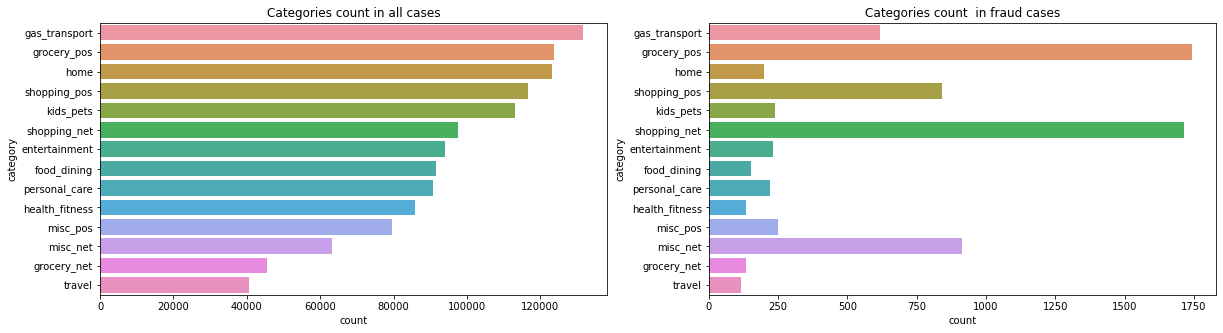

In [11]:
#count plot for categories
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(y='category', data=data, order = data['category'].value_counts().index, ax= ax[0])
sns.countplot(y='category', data=data[data['is_fraud']==1], order = data['category'].value_counts().index, ax= ax[1])

ax[0].set_title('Categories count in all cases')
ax[1].set_title('Categories count  in fraud cases')

plt.show()

In [4]:
## dob and unix_time were objects - changing them to datetime type
date_list = ['trans_date_trans_time','dob']
for i in date_list:
    data[i] = pd.to_datetime(data[i])

#making age column
data['age'] = (np.round((data['trans_date_trans_time'] - data['dob'])/np.timedelta64(1,'Y')))

Text(0.5, 1.0, 'Age distribution in fraud cases')

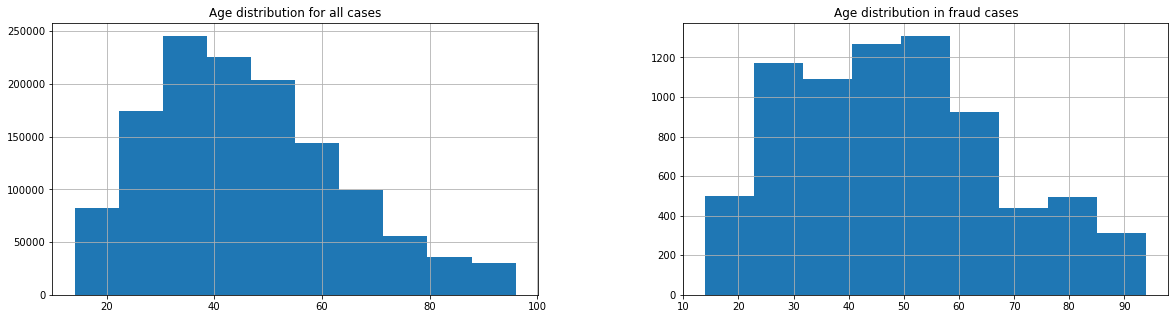

In [15]:
#age for all cases and fraud cases
fig, ax = plt.subplots(1,2,figsize=(20,5))
data.hist(column='age', ax=ax[0])
data[data['is_fraud']==1].hist(column='age', ax=ax[1], bins=9)
ax[0].set_title('Age distribution for all cases')
ax[1].set_title('Age distribution in fraud cases')

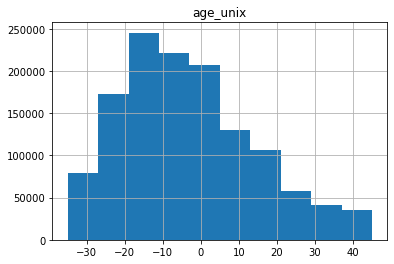

In [6]:
#age from unix_time
date_list = ['unix_time']
for i in date_list:
    data[i] = pd.to_datetime(data[i])

#making age column
data['age_unix'] = (np.round((data['unix_time'] - data['dob'])/np.timedelta64(1,'Y')))
data.hist(column='age_unix');
#plt.suptitle('Age from Unix_time')

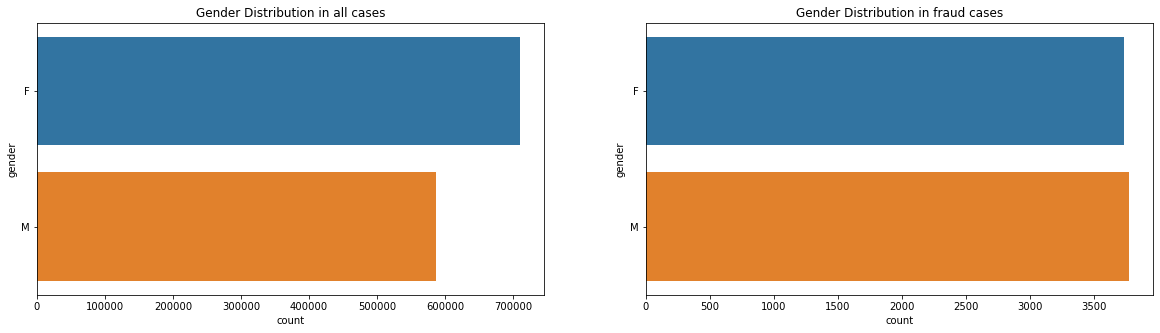

In [19]:
#count plot for gender - for all cases and fraud
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(y='gender', data=data, order = data['gender'].value_counts().index, ax= ax[0])
#plt.show()
sns.countplot(y='gender', data=data[data['is_fraud']==1], order = data['gender'].value_counts().index, ax= ax[1])
ax[0].set_title('Gender Distribution in all cases')
ax[1].set_title('Gender Distribution in fraud cases')

plt.show()

In [20]:
#more women than man overall but in fraud only cases its equal

In [7]:
#grouping jobs on copy of data
dataJ = data.copy()

dataJ['job'].replace(['Psychologist, counselling', 'Dance movement psychotherapist', 'Pathologist', 'Therapist, occupational', 'Physiotherapist', 'Forensic psychologist', 'Geochemist', 'Optician, dispensing', 'Psychologist, forensic', 'Physicist, medical', 'Ambulance person', 'Paediatric nurse', 'Child psychotherapist', 'Paramedic', 'Educational psychologist', 'Health service manager', 'Exercise physiologist''Surgeon', 'Clinical cytogeneticist',
       'Therapist, horticultural', 'Health visitor', 'Medical secretary', 'Diagnostic radiographer', 'Medical sales representative', 'Therapist, sports', 'Medical physicist', 'Cytogeneticist','Radiographer, diagnostic','Occupational hygienist','Doctor, general practice','Counselling psychologist', 'Community pharmacist','Chiropodist', 'Engineer, biomedical','Surgeon','Psychiatric nurse', 'General practice doctor','Embryologist, clinical', 'Immunologist', 'Health physicist', 'Occupational psychologist', 'Psychologist, sport and exercise', 'Dispensing optician', 
       'Doctor, hospital','Occupational therapist','Medical technical officer', 'Hospital pharmacist','Therapist, music','Therapist, art','Therapist, drama', 'Orthoptist', 'Phytotherapist','Pharmacologist', 'Exercise physiologist','Psychotherapist, child', 'Toxicologist', 'Podiatrist', 'Mental health nurse', "Nurse, children's", 'Physiological scientist', 'Art therapist', 'Optometrist', 'Psychotherapist', 'Pharmacist, community', 'Music therapist', 'Acupuncturist', 'Hospital doctor', 'Scientist, physiological', 'Clinical biochemist', 'Counsellor', 'Child psychotherapist', 'Homeopath', 'Oncologist', 'Environmental health practitioner', 'Occupational hygienist','Learning disability nurse',
       'Neurosurgeon','Scientist, clinical (histocompatibility and immunogenetics)', 'Research scientist (medical)', 'Psychologist, clinical', 'Herpetologist','Scientist, research (medical)', 'Nutritional therapist', 'Biomedical scientist', 'Biomedical scientist', 'Herbalist', 'Osteopath', 'Radiographer, therapeutic', 'Health promotion specialist', 'Psychiatrist', 'Pharmacist, hospital', 'Clinical psychologist', 'Sport and exercise psychologist','Nurse, mental health',], 'medical/therapy', inplace=True)
dataJ['job'].replace(['Associate Professor','Teaching laboratory technician','Careers adviser','Professor Emeritus','Community education officer','Librarian, academic','Learning mentor','Special educational needs teacher', 'Administrator, education','Higher education careers adviser', 'English as a second language teacher', 'Teacher, English as a foreign language', 'Teacher, early years/pre', 'Primary school teacher', 'Secondary school teacher', 'Further education lecturer', 'Teacher, secondary school', 'Teacher, special educational needs', 'Early years teacher', 'Lecturer, further education', 'Teacher, primary school', 'English as a second language teacher','Careers information officer', 'Academic librarian', 'TEFL teacher', 'Teacher, adult education', 'English as a foreign language teacher', 'Lecturer, higher education', 'Education administrator','Private music teacher', ], 'education', inplace=True)
dataJ['job'].replace(['Engineer, civil (consulting)','Metallurgist','Mudlogger','Building surveyor','Rural practice surveyor','Architectural technologist','Planning and development surveyor','Quantity surveyor','Surveyor, rural practice','Scientist, biomedical','Field seismologist', 'Plant breeder/geneticist','Surveyor, land/geomatics','Social researcher', 'Wellsite geologist','Hydrologist','Building control surveyor','Surveyor, land/geomatics','Surveyor, mining','Scientist, research (physical sciences)','Engineer, production','Engineer, manufacturing','Engineer, site','Information officer','Contracting civil engineer','Analytical chemist','Broadcast engineer','Engineer, materials','Petroleum engineer','Hydrographic surveyor', 'Geoscientist','Research scientist (maths)', 'Engineer, aeronautical','Aeronautical engineer','Geologist, wellsite', 'Seismic interpreter', 'Surveyor, hydrographic','Hydrogeologist','Geneticist, molecular','IT consultant','Geophysicist/field seismologist','Data scientist', 'Engineer, civil (contracting)','Garment/textile technologist','Statistician','Drilling engineer','Communications engineer', 'Information systems manager','Soil scientist','Engineer, agricultural','Programmer, applications','Manufacturing systems engineer', 'Web designer','Site engineer','Chemist, analytical','Engineer, automotive','Engineer, maintenance','Scientific laboratory technician','Building services engineer','Maintenance engineer','Biomedical engineer','Oceanographer', 'Colour technologist','Civil engineer, contracting','Engineer, drilling','Engineer, petroleum','Manufacturing engineer', 'Animal technologist','Production engineer', 'Biochemist, clinical','Engineer, manufacturing''Engineer, production','Control and instrumentation engineer','Research scientist (life sciences)','Water quality scientist','Risk analyst','Engineer, control and instrumentation','Clothing/textile technologist','Chemical engineer','Sales professional, IT', 'Scientist, marine','Intelligence analyst', 'Clinical research associate','Engineer, building services','Programmer, multimedia','Chief Technology Officer','Minerals surveyor','Multimedia programmer','IT trainer','Structural engineer', 'Land/geomatics surveyor','Engineer, structural','Electronics engineer', 'Mechanical engineer','Commercial/residential surveyor','Database administrator','Materials engineer','Engineering geologist','Geologist, engineering', 'Science writer', 'Audiological scientist', 'Engineer, communications','Mining engineer','Scientist, audiological','Operations geologist', 'Engineering geologist''Engineer, biomedical', 'Research scientist (physical sciences)','Engineer, mining','Engineer, broadcasting (operations)','Product/process development scientist', 'Engineer, electronics', 'Water engineer','Engineer, technical sales', 'Electrical engineer', 'Systems developer', 'Applications developer', 'Engineer, land', 'Surveyor, minerals', 'Scientist, research (maths)', 'Network engineer', 'Systems analyst', 'Energy engineer'], 'engineering/IT/science', inplace=True)
dataJ['job'].replace(['Lawyer',"Barrister's clerk",'Legal secretary', 'Solicitor','Patent attorney', 'Trade mark attorney','Chartered legal executive (England and Wales)','Licensed conveyancer','Prison officer','Barrister','Probation officer', 'Solicitor, Scotland','Police officer'], 'law', inplace=True)
dataJ['job'].replace(['Conservation officer, historic buildings','Advice worker','Environmental education officer','Administrator, local government','Museum education officer','Community arts worker','Social research officer, government','Conservation officer', 'Tourism officer','historic buildings','Civil Service fast streamer','Civil Service administrator','Equality and diversity officer','Community development worker', 'Public librarian','Town planner','Nature conservation officer', 'Race relations officer', 'Arts development officer','Development worker, community','Immigration officer','Health and safety adviser','Historic buildings inspector/conservation officer','Training and development officer','Museum/gallery exhibitions officer','Fisheries officer','Waste management officer','Careers information officer','Trading standards officer', 'Education officer, community', 'Education officer, museum', 'Librarian, public','Tourist information centre manager','Exhibitions officer, museum/gallery','Local government officer','Community education officer','Sports development officer'], 'public service', inplace=True)
dataJ['job'].replace(['Equities trader','Tax adviser','Comptroller','Insurance risk surveyor','Accountant, chartered','Insurance claims handler','Dealer','Air broker','Investment banker, operational', 'Investment banker, corporate','Insurance broker', 'Tax adviser''Insurance risk surveyor', 'Tax inspector','Futures trader','Insurance underwriter','Accountant, chartered public finance','Chartered public finance accountant','Chartered accountant','Retail banker','Accountant, chartered certified','Loss adjuster, chartered','Chief Financial Officer','Corporate investment banker','Pension scheme manager','Investment analyst','Chartered loss adjuster','Pensions consultant','Accounting technician','Financial adviser', 'Financial trader','Claims inspector/assessor','Senior tax professional/tax inspector', 'Economist'], 'financial', inplace=True)
dataJ['job'].replace(['Television/film/video producer','Editor, commissioning','Gaffer','Textile designer','Location manager','Hotel manager','Public house manager','Furniture conservator/restorer','Production manager', 'Magazine journalist','Media buyer','Theme park manager','Designer, multimedia','Visual merchandiser','Product designer','Broadcast journalist','Dancer','Catering manager', 'Conservator, furniture', 'Media planner','Producer, television/film/video','Art gallery manager','Stage manager', 'Artist', 'Administrator, arts','Glass blower/designer','Sports administrator', 'Presenter, broadcasting','Outdoor activities/education manager', 'Field trials officer','Restaurant manager, fast food', 'Designer, television/film set','Designer, textile','Set designer','Museum/gallery conservator','Fitness centre manager','Radio broadcast assistant','Industrial/product designer','Theatre manager','Travel agency manager','Copy', 'Jewellery designer','Bookseller','Television floor manager','Bookseller','Designer, exhibition/display','Press photographer','Interior and spatial designer','Musician','Music tutor','Furniture designer', 'Editor, commissioning''Radio broadcast assistant','Ceramics designer', 'Animator','Special effects artist','Designer', 'Press sub', 'Writer','Designer, industrial/product','Commissioning editor','Radio producer','Illustrator','Production assistant, television', 'Tour manager', 'Magazine features editor','Production assistant, radio','Designer, interior/spatial','Camera operator','Designer, ceramics/pottery','Editor, film/video','Broadcast presenter','Archivist', 'Journalist, newspaper','Conservator, museum/gallery', 'Producer, radio', 'Theatre director', 'Technical brewer', 'Television production assistant','Exhibition designer','Designer, jewellery', 'Editor, magazine features','Film/video editor', 'Designer, furniture','Video editor','Television camera operator', 'Curator', 'Fine artist','Leisure centre manager','Event organiser','Programme researcher, broadcasting/film/video'], 'entertainment/arts', inplace=True)
dataJ['job'].replace(['Armed forces technical officer','Firefighter','Naval architect','Armed forces logistics/support/administrative officer','Armed forces training and education officer'], 'armed forces & firefighters', inplace=True)
dataJ['job'].replace(['Advertising copywriter','Company secretary','Warehouse manager','Interpreter','Sales promotion account executive','Personnel officer', 'Industrial buyer','Charity fundraiser','Public affairs consultant','Energy manager','Heritage manager','Emergency planning/management officer','Management consultant','Buyer, retail','Public relations officer','Marketing executive','Regulatory affairs officer','Secretary/administrator','Chief of Staff', 'Chief Marketing Officer','Chief Operating Officer', 'Buyer, industrial','Records manager','Public relations account executive','Chief Executive Officer','Chief Strategy Officer','Retail manager',"Politician's assistant",'Merchandiser, retail','Charity officer', 'Retail buyer','Logistics and distribution manager','Sales executive','Purchasing manager','Advertising account executive','Volunteer coordinator', 'Copywriter, advertising','Product manager','Architect','Lexicographer','Facilities manager','Advertising account planner','Administrator, charities/voluntary organisations','Retail merchandiser', 'Telecommunications researcher','Administrator','Research officer, trade union', 'Human resources officer','Research officer, political party','Operational researcher', 'Market researcher','Call centre manager'], 'other office', inplace=True)
dataJ['job'].replace(['Arboriculturist', 'Estate manager/land agent','Environmental manager','Forest/woodland manager','Ecologist', 'Horticulturist, commercial','Horticultural consultant','Farm manager','Warden/ranger','Landscape architect','Land', 'Horticultural therapist','Commercial horticulturist','Agricultural consultant','Environmental consultant','Amenity horticulturist','Tree surgeon'], 'enviromental/land', inplace=True)
dataJ['job'].replace(['Transport planner','Airline pilot','Air cabin crew','Air traffic controller','Cabin crew','Air traffic controller','Ship broker','Freight forwarder','Pilot, airline'], 'travel/transport', inplace=True)
dataJ['job'].replace(['Cartographer','Contractor', 'Development worker, international aid', 'Aid worker','Animal nutritionist','Veterinary surgeon','Archaeologist', 'Sub', 'Make','Barista','Quarry manager'], 'other', inplace=True)

In [22]:
dataJ.job.unique()

array(['medical/therapy', 'education', 'public service', 'law',
       'travel/transport', 'enviromental/land', 'entertainment/arts',
       'other office', 'engineering/IT/science',
       'armed forces & firefighters', 'financial', 'other'], dtype=object)

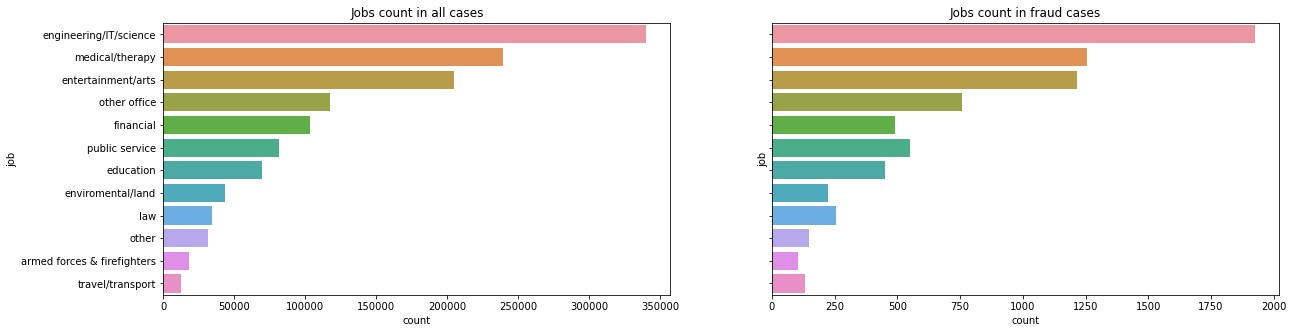

In [23]:
#dataJ.job.unique()
#dataJ.job.value_counts()

#plot for jobs
fig, ax = plt.subplots(1,2,figsize=(20,5),sharey=True)

sns.countplot(y='job', data=dataJ, order = dataJ['job'].value_counts().index, ax=ax[0])
sns.countplot(y='job', data=dataJ[dataJ['is_fraud']==1], order = dataJ['job'].value_counts().index, ax=ax[1])
ax[0].set_title('Jobs count in all cases')
ax[1].set_title('Jobs count in fraud cases')
plt.show()

In [24]:
#slightly more fraud for those in public service, law and travel/transport roles
#not significant enough to keep

### looking at locations

In [25]:
#creating geopandas dataframe
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.long, data.lat))

<AxesSubplot:>

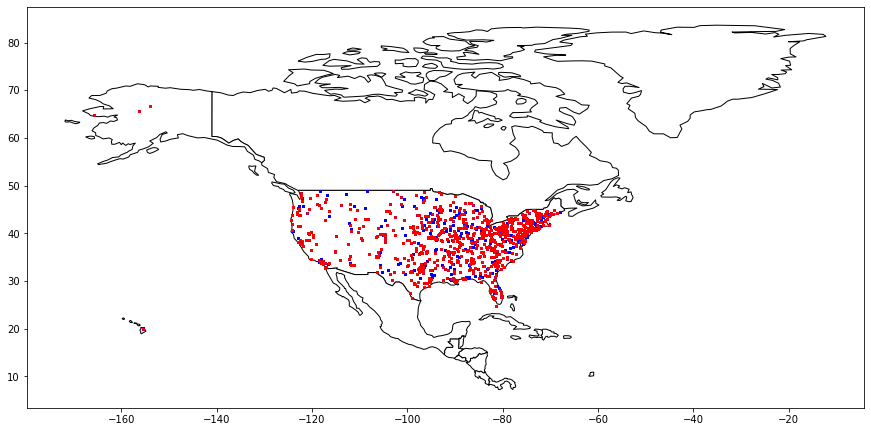

In [26]:
#plotting using standard geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world.continent == 'North America'].plot(figsize= (15, 15), color='white', edgecolor='black')
gdf[gdf['is_fraud']==0].plot(ax=base, marker='o', color='blue', markersize=2)
gdf[gdf['is_fraud']==1].plot(ax=base, marker='o', color='red', markersize=2)

In [27]:
#looks like higher concentration on east coast - especially north east 
#but that mirrors spread of normal transactions

<AxesSubplot:>

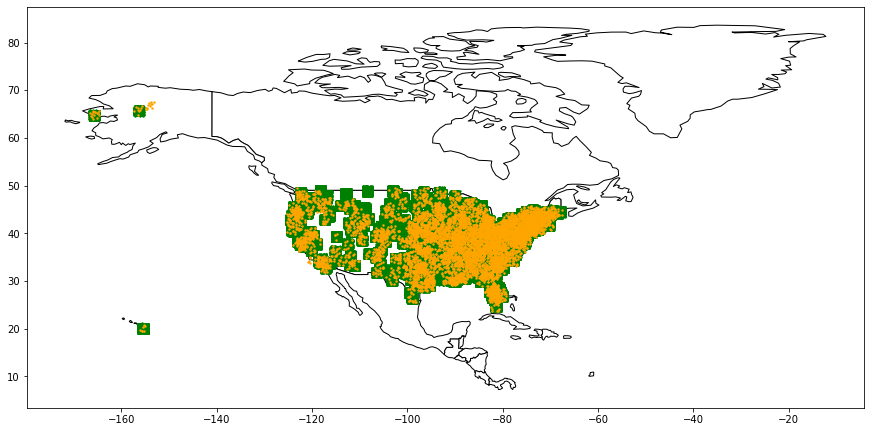

In [28]:
#now same thing for merch lat and long
gdfM = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.merch_long, data.merch_lat))
worldM = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world.continent == 'North America'].plot(figsize= (15, 15), color='white', edgecolor='black')
gdf[gdfM['is_fraud']==0].plot(ax=base, marker='o', color='green', markersize=2)
gdf[gdfM['is_fraud']==1].plot(ax=base, marker='o', color='orange', markersize=2)

In [29]:
#look into distance between trans and merch locations

In [8]:
# Function to find distance between two points using long and lat
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    newlon = lon2 - lon1
    newlat = lat2 - lat1
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist 
    return km

In [9]:
#combining lat and long columns for clients and merchants
data['lat_long'] = tuple(zip(*data[['lat','long']].values.T))
data['merch_latlong'] = tuple(zip(*data[['merch_lat','merch_long']].values.T))

In [10]:
# creating column for distance between client and merch
data['distance'] = haversine(data['long'],data['lat'],data['merch_long'],data['merch_lat'])

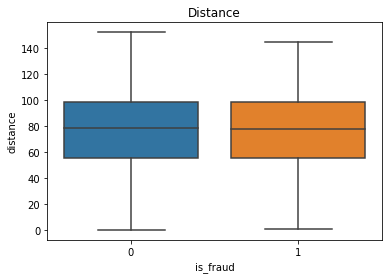

In [11]:
#boxplot for distance
sns.boxplot(x='is_fraud', y='distance', data=data).set_title("Distance");
#not much difference - can use violin plot if prefer - see below

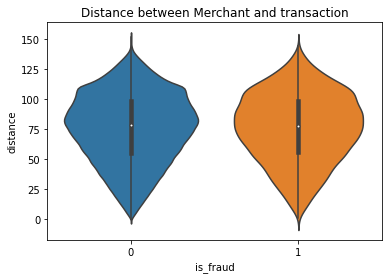

In [12]:
#different way of plotting it
sns.violinplot(data = data, y ='distance', x='is_fraud').set_title('Distance between Merchant and transaction');

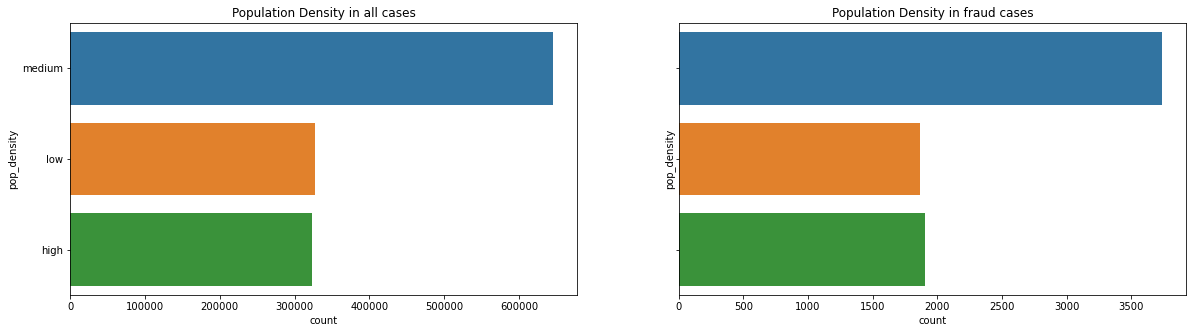

In [13]:
# grouping population density 
data['pop_density'] = pd.qcut(data.city_pop, q=[0, .25, .75, 1], labels=['low', 'medium', 'high'])

#plotting 
fig, ax = plt.subplots(1,2,figsize=(20,5),sharey=True)
sns.countplot(y='pop_density', data=data, order = data['pop_density'].value_counts().index, ax=ax[0])
sns.countplot(y='pop_density', data=data[data['is_fraud']==1], order = data['pop_density'].value_counts().index, ax=ax[1])
ax[0].set_title('Population Density in all cases')
ax[1].set_title('Population Density in fraud cases')
plt.show()

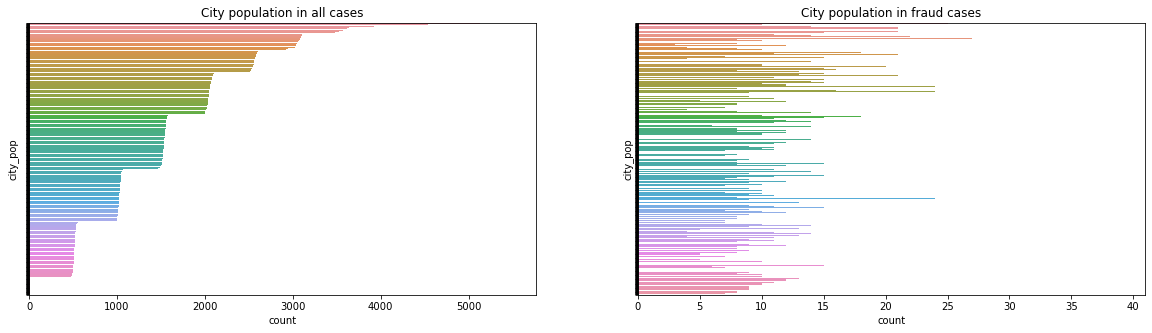

In [37]:
fig, ax = plt.subplots(1,2,figsize=(20,5),sharey=True)
sns.countplot(y='city_pop', data=data, order = data['city_pop'].value_counts().index, ax=ax[0])
sns.countplot(y='city_pop', data=data[data['is_fraud']==1], order = data['city_pop'].value_counts().index, ax=ax[1])
ax[0].set_title('City population in all cases')
ax[1].set_title('City population in fraud cases')
ax[0].set_yticklabels([])
plt.show()

In [38]:
#doesnt make much difference to the spread so will drop

In [14]:
#encoding states column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['state_encoded'] = labelencoder.fit_transform(data['state'])

In [15]:
q = data['is_fraud'].groupby(data.state).value_counts(normalize=True)*100
p = q.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
p

state  is_fraud
AK     0           98.301887
       1            1.698113
AL     0           99.475469
       1            0.524531
AR     0           99.482764
                     ...    
WI     1            0.555026
WV     0           99.431708
       1            0.568292
WY     0           99.430701
       1            0.569299
Name: is_fraud, Length: 101, dtype: float64

In [16]:
q = data['is_fraud'].groupby(data.state).value_counts(normalize=True)*100
p = q.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
st = data.state.unique()
st.sort()
state_list = []
percentage_fraud = []

for i in st:
    try:
        t = p.loc[i:i] 
        state_list.append(i)
        percentage_fraud.append(t[1])
    except IndexError:
        state_list.append(i)
        percentage_fraud.append(0)
        
states_perc = pd.DataFrame(list(zip(state_list, percentage_fraud)), columns=['state','percentage_fraud'])
states_sorted = states_perc.sort_values('percentage_fraud', ascending=False)
states_sorted

state  percentage_fraud
39    PA          2.727273
0     AK          1.698113
33    NM          0.838238
5     CO          0.814121
37    OK          0.801204
42    SD          0.797539
29    ND          0.744786
21    MD          0.720994
30    NE          0.712733
35    NY          0.690620
16    IN          0.678379
45    UT          0.676923
34    NV          0.664663
40    RI          0.661185
9     DE          0.658527
23    MI          0.652709
46    VA          0.611829
41    SC          0.600454
20    MA          0.599397
7     DC          0.581234
4     CA          0.578424
38    OR          0.573597
14    ID          0.573384
44    TX          0.570147
50    WV          0.569299
49    WI          0.568292
10    FL          0.560181
19    LA          0.557531
48    WA          0.555026
17    KS          0.544337
25    MO          0.542760
36    OH          0.536163
12    HI          0.526218
1     AL          0.524531
2     AR          0.517236
22    ME          0.515665
15    IL          0.514866
47    VT          0.507292
43    TN          0.504870
32    NJ          0.499787
24    MN          0.497357
27    MT          0.492302
31    NH          0.479616
18    KY          0.434057
28    NC          0.385500
3     AZ          0.343547
11    GA          0.273544
26    MS          0.272248
6     CT          0.207738
13    IA          0.198377
8     DE          0.000000

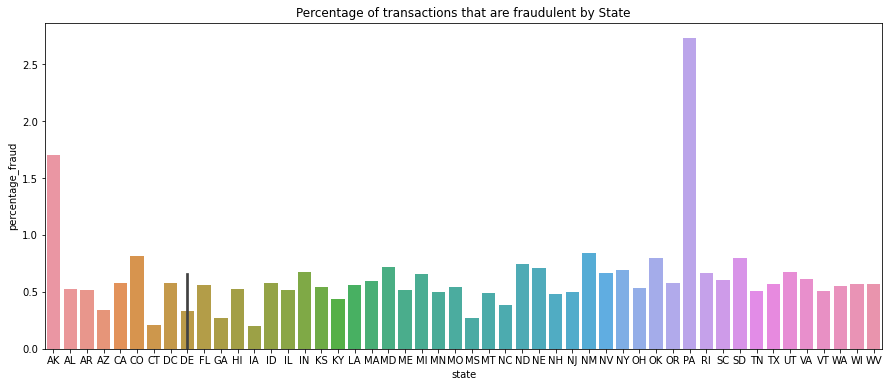

In [44]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(y="percentage_fraud", x="state", data=states_perc, ax=ax)
plt.title('Percentage of transactions that are fraudulent by State')
plt.show()

In [43]:
#2 states much more higher levels of fraud - AK & PA so worth keeping state_encoded as a varuable

### looking at time 

In [17]:
#splitting date into time, week and month+year
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] =data['trans_date_trans_time'].dt.day_name()
data['year_month'] =data['trans_date_trans_time'].dt.to_period('M')

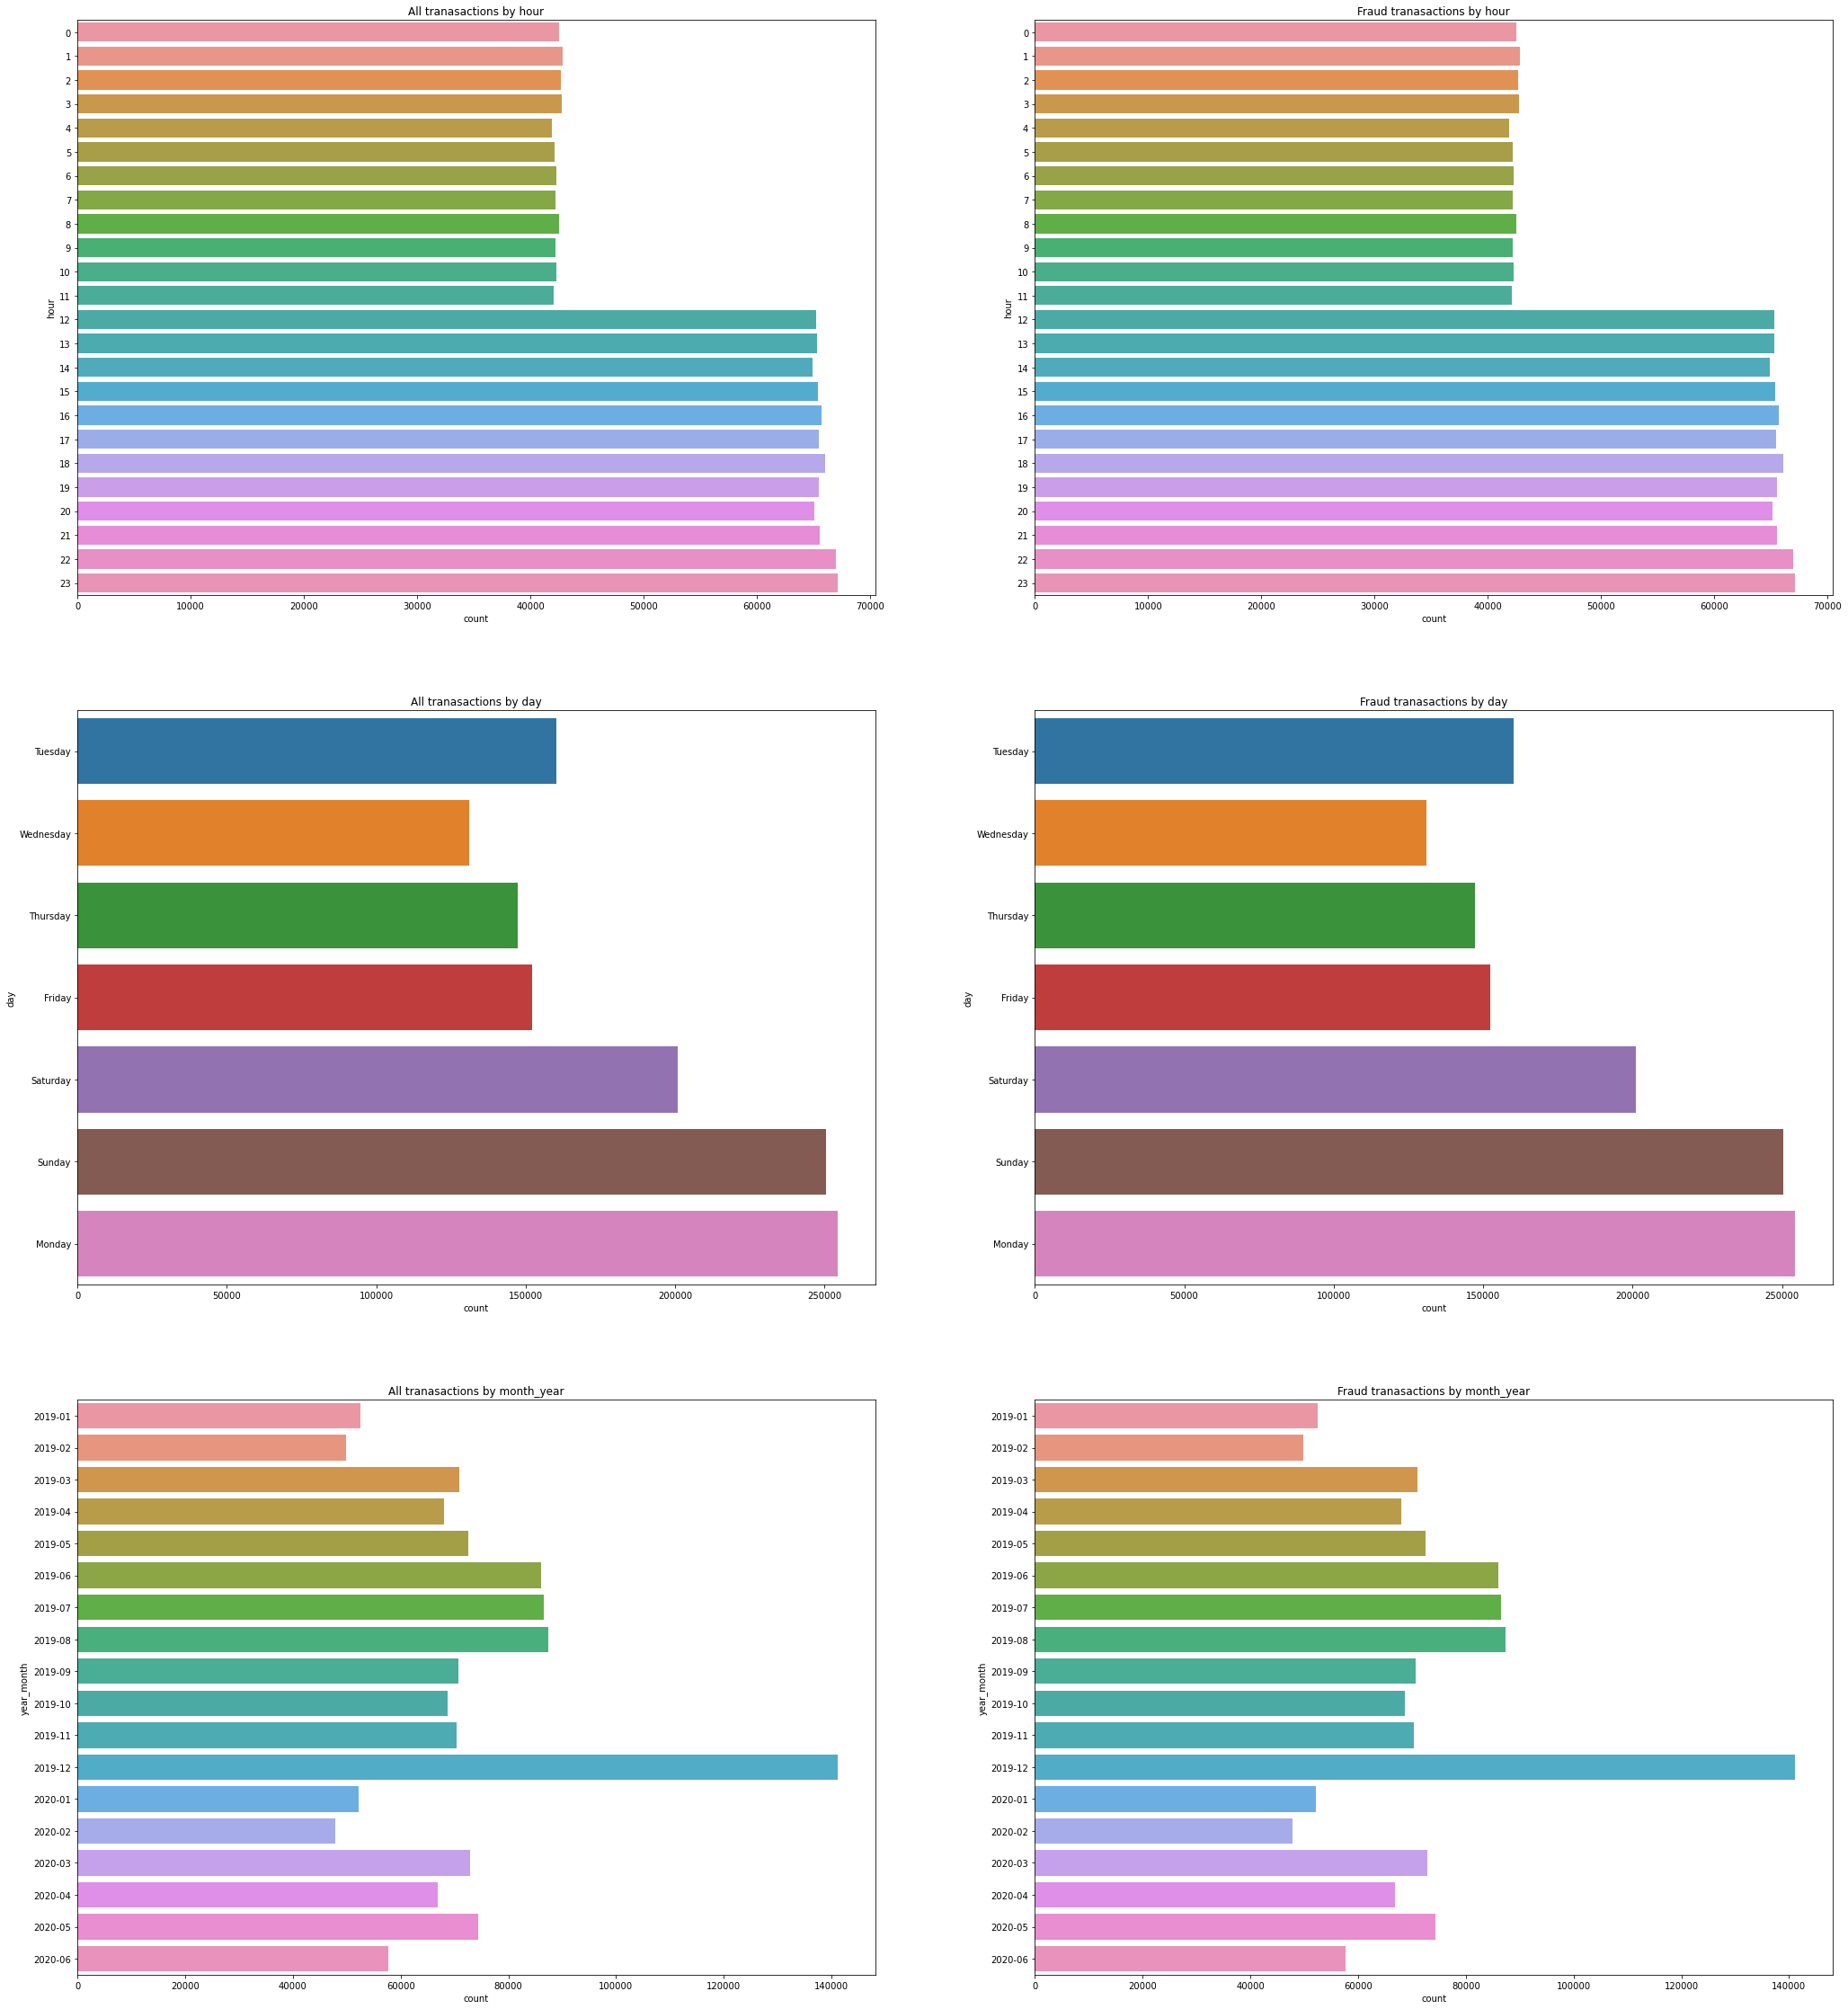

In [45]:
#plotting time data 
fig, ax = plt.subplots(3,2,figsize=(35,40))
sns.countplot(y=data.hour, data=data, ax=ax[0,0]) 
sns.countplot(y=data.hour, data=data[data['is_fraud']==1], ax=ax[0,1])
sns.countplot(y=data.day, data=data, ax=ax[1,0]) 
sns.countplot(y=data.day, data=data[data['is_fraud']==1], ax=ax[1,1])
sns.countplot(y=data.year_month, data=data, ax=ax[2,0]) 
sns.countplot(y=data.year_month, data=data[data['is_fraud']==1], ax=ax[2,1])

ax[0,0].set_title('All tranasactions by hour')
ax[0,1].set_title('Fraud tranasactions by hour')
ax[1,0].set_title('All tranasactions by day')
ax[1,1].set_title('Fraud tranasactions by day')
ax[2,0].set_title('All tranasactions by month_year')
ax[2,1].set_title('Fraud tranasactions by month_year')
plt.show()

In [46]:
#most transaction between 12 & 24, most fraud between 22 & 03
#most transaction Sunday & Monday, fraud more evenly spread- but bit more on weekend
#anything on months ? propbably drop

In [47]:
#very little difference between fraud cases and non fraud cases 

### what about individual card?

In [48]:
#consider distance between transactions and time of transactions - if 2 widely apart in short time it may be fraud
#eg: different states for same cc num in under 1hr? - create travel_speed function?

#Number of retail locations per day and the duration between the locations in the past one week, two weeks or XX weeks,
#Minimum number of minutes between transactions of two retail locations in the past one week, two weeks or XX weeks,

In [49]:
#consider payments in time period
#Average or maximum amounts spent per transaction in the past one week, two weeks or XX weeks
#Average or maximum amounts spent per day in the past one week, two weeks or XX weeks,
#Average or maximum amounts by merchant category in the past one week, two weeks or XX weeks,

In [50]:
#transactions with same merchant type (average etc)

In [51]:
#count of how many unique card number there are
count = 0
# list to hold cc's
cards = []
  
# loop for counting the unique values
for i in range(0, len(data['cc_num'])):
    if data['cc_num'][i] not in cards: 
        cards.append(data['cc_num'][i])
        count += 1
        
print(f'{count} different cards used for the 1296675 transactions in dataset')

983 different cards used for the 1296675 transactions in dataset


Text(0.5, 1.0, 'Card usage frequency')

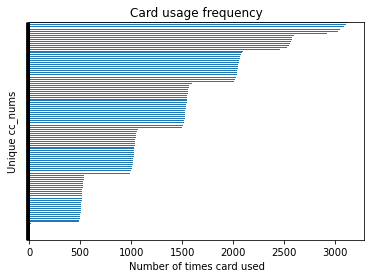

In [52]:
#plotting how often cards are used
fig,ax = plt.subplots(1)
data['cc_num'].value_counts().sort_values().plot(kind = 'barh')
ax.set_yticklabels([])
plt.ylabel('Unique cc_nums')
plt.xlabel('Number of times card used')
plt.title('Card usage frequency')

In [53]:
cc = data['state'].groupby(data.cc_num).value_counts(normalize=True)
cc

cc_num               state
60416207185          WY       1.0
60422928733          SC       1.0
60423098130          OK       1.0
60427851591          OK       1.0
60487002085          MS       1.0
                             ... 
4958589671582726883  VA       1.0
4973530368125489546  AR       1.0
4980323467523543940  NH       1.0
4989847570577635369  SC       1.0
4992346398065154184  IL       1.0
Name: state, Length: 983, dtype: float64

In [54]:
cc = data['state'].groupby(data.cc_num).value_counts(normalize=True)
ccs = data.cc_num.unique()
cc_num = []
states_used = []

for j in ccs:
    try:
        ts = cc.loc[j:j] 
        cc_num.append(j)
        new_st = [str(x) for x in ts][0]
        states_used.append(new_st)
    except IndexError:
        cc_num.append(j)
        states_used.append(0)
        
card_useby_state = pd.DataFrame(list(zip(cc_num, states_used)), columns=['cc_num','no. of states card used in'])
#card_useby_state['no. of states card used in'].unique()
card_useby_state.head()

cc_num no. of states card used in
0  2703186189652095                        1.0
1      630423337322                        1.0
2    38859492057661                        1.0
3  3534093764340240                        1.0
4   375534208663984                        1.0

In [55]:
# all cards only used in one state
#means if card is used in 2 states can flag it

### looking at amount

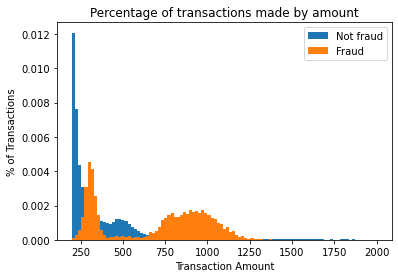

In [56]:
#percentage of transactions for different amounts that are fraud or not
bins = np.linspace(200, 2000, 100)
plt.hist(data[(data['is_fraud']==0)]['amt'], bins, density=True)
plt.hist(data[(data['is_fraud']==1)]['amt'], bins, density=True)

plt.title('Percentage of transactions made by amount')
plt.xlabel('Transaction Amount')
plt.ylabel('% of Transactions')
plt.legend(labels=["Not fraud","Fraud"])
plt.show()

In [57]:
#what does it show ?
#tendency for frauds to be higher amounts - need more detail on this

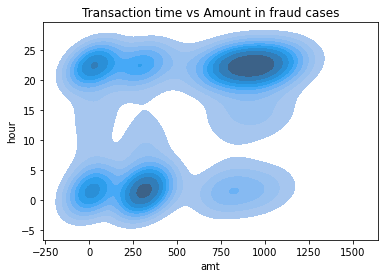

In [58]:
#hour vs amt
sns.kdeplot(y="hour", x="amt",data=data[data['is_fraud']==1], shade=True).set_title("Transaction time vs Amount in fraud cases")

plt.show()

In [60]:
#### use data['amt'].corr(data['unix_hour'] to get correlation betweeen the 2 
#for all cases not just for fraud

#would data['amt'].corr(data) give me all the things that correlate with amt ?
#for finding high value targets
#run below studues with amt as y ?

In [18]:
#encoding category
data['category_encoded'] = labelencoder.fit_transform(data['category'])

In [19]:
#encoding job
data['job_encoded'] = labelencoder.fit_transform(data['job'])

In [20]:
#making fraud only dataset
fraud = pd.DataFrame(data[data['is_fraud']==1])

In [109]:
print(f'Correlation between amount and transaction hour in all cases : \n {(data.amt.corr(data.hour))}')
print(f'Correlation between amount and transaction hour in fraud cases : \n {(fraud.amt.corr(fraud.hour))}')

Correlation between amount and transaction hour in all cases : 
 -0.02281135645468459
Correlation between amount and transaction hour in fraud cases : 
 0.3617115216503804


In [62]:
#plotting it
#sns. regplot(x=data['amt'], y=data['hour']) 
#sns. regplot(x=fraud['amt'], y=fraud['hour']) 

In [114]:
#correlations between amount & other variables

#cc_num
print(f'Correlation between amount and card number in all cases : \n {(data.amt.corr(data.cc_num))}')
print(f'Correlation between amount and card number in fraud cases : \n {(fraud.amt.corr(fraud.cc_num))}')

#catagory_encoded
print(f'Correlation between amount and category in all cases : \n {(data.amt.corr(data.category_encoded))}')
print(f'Correlation between amount and catagory in fraud cases : \n {(fraud.amt.corr(fraud.category_encoded))}')

#state_encoded
print(f'Correlation between amount and state in all cases : \n {(data.amt.corr(data.state_encoded))}')
print(f'Correlation between amount and state in fraud cases : \n {(fraud.amt.corr(fraud.state_encoded))}')

#zip
print(f'Correlation between amount and zip in all cases : \n {(data.amt.corr(data.zip))}')
print(f'Correlation between amount and zip in fraud cases : \n {(fraud.amt.corr(fraud.zip))}')

#city_pop
print(f'Correlation between amount and city_pop in all cases : \n {(data.amt.corr(data.city_pop))}')
print(f'Correlation between amount and city_pop in fraud cases : \n {(fraud.amt.corr(fraud.city_pop))}')

#distance
print(f'Correlation between amount and distance in all cases : \n {(data.amt.corr(data.distance))}')
print(f'Correlation between amount and distance in fraud cases : \n {(fraud.amt.corr(fraud.distance))}')

Correlation between amount and card number in all cases : 
 0.0017693997657781066
Correlation between amount and card number in fraud cases : 
 0.026344535992690446
Correlation between amount and category in all cases : 
 0.030866976047450673
Correlation between amount and catagory in fraud cases : 
 0.6951368473355266
Correlation between amount and state in all cases : 
 0.0017183662342580752
Correlation between amount and state in fraud cases : 
 0.0031126181057789413
Correlation between amount and zip in all cases : 
 0.0018434020345932077
Correlation between amount and zip in fraud cases : 
 -0.020545526504058942
Correlation between amount and city_pop in all cases : 
 0.0058182839801329145
Correlation between amount and city_pop in fraud cases : 
 0.021916270244749958
Correlation between amount and distance in all cases : 
 -0.0010848584412471018
Correlation between amount and distance in fraud cases : 
 0.014305130723337892


In [21]:
#stocking a dataframe with this info
variables = ['hour', 'category_encoded', 'state_encoded', 'zip', 'city_pop', 'distance']
column_names = ['Variable', 'Correlation_all_cases', 'Correlation_fraud_cases']
df = pd.DataFrame(columns = column_names)

hour_row = {'Variable': 'hour', 'Correlation_all_cases':(data.amt.corr(data.hour)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.hour))}
df = df.append(hour_row, ignore_index=True)
category_row = {'Variable': 'category', 'Correlation_all_cases':(data.amt.corr(data.category_encoded)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.category_encoded))}
df = df.append(category_row, ignore_index=True)
state_row = {'Variable': 'state', 'Correlation_all_cases':(data.amt.corr(data.state_encoded)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.state_encoded))}
df = df.append(state_row, ignore_index=True)
zip_row = {'Variable': 'zip', 'Correlation_all_cases':(data.amt.corr(data.zip)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.zip))}
df = df.append(zip_row, ignore_index=True)
city_pop_row = {'Variable': 'city_pop', 'Correlation_all_cases':(data.amt.corr(data.city_pop)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.city_pop))}
df = df.append(city_pop_row, ignore_index=True)
distance_row = {'Variable': 'distance', 'Correlation_all_cases':(data.amt.corr(data.distance)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.distance))}
df = df.append(distance_row, ignore_index=True)
age_row = {'Variable': 'age', 'Correlation_all_cases':(data.amt.corr(data.age)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.age))}
df = df.append(age_row, ignore_index=True)
job_row = {'Variable': 'job', 'Correlation_all_cases':(data.amt.corr(data.job_encoded)), 'Correlation_fraud_cases':(fraud.amt.corr(fraud.job_encoded))}
df = df.append(job_row, ignore_index=True)
df

Variable Correlation_all_cases Correlation_fraud_cases
0      hour             -0.022811                0.361712
1  category              0.030867                0.695137
2     state              0.001718                0.003113
3       zip              0.001843               -0.020546
4  city_pop              0.005818                0.021916
5  distance             -0.001085                0.014305
6       age              -0.00975                0.041434
7       job             -0.000628               -0.025758

In [141]:
df.sort_values(by=['Correlation_fraud_cases'], inplace=True, ascending=False)
df

Variable  Correlation_all_cases  Correlation_fraud_cases
1  category               0.030867                 0.695137
0      hour              -0.022811                 0.361712
6       age              -0.009750                 0.041434
4  city_pop               0.005818                 0.021916
5  distance              -0.001085                 0.014305
2     state               0.001718                 0.003113
3       zip               0.001843                -0.020546
7       job              -0.000628                -0.025758

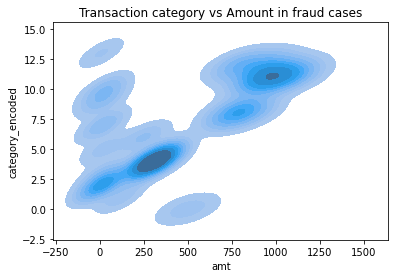

In [142]:
#hour vs amt
sns.kdeplot(y="category_encoded", x="amt",data=data[data['is_fraud']==1], shade=True).set_title("Transaction category vs Amount in fraud cases")

plt.show()

In [ ]:
#could use just fraud data as a way to deal with unbalanced datasets

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 33 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

### Formatting the data

In [22]:
# getting dummies
#data = pd.get_dummies(data = data, columns = ['gender'] , prefix = ['gender'])
data = pd.get_dummies(data = data, columns = ['category'] , prefix = ['category'])
#data = pd.get_dummies(data = data, columns = ['day'] , prefix = ['day'])

In [23]:
# dropping unnecessary columns - explain why for each one
data.drop(['trans_date_trans_time', 'unix_time','first', 'last', 'merchant','street', 'state','lat', 'long', 'merch_lat', 'merch_long', 'dob', 'job','lat_long','merch_latlong', 'year_month', 'trans_num', 'city', 'pop_density'], axis = 1, inplace=True)


In [28]:
#dropping the extras not listed
data.drop(['age_unix', 'job_encoded'], axis = 1, inplace=True)
#day and gender not relevant so going to drop them from train and test sets
#data.drop(['day_Friday', 'day_Monday','day_Saturday','day_Sunday','day_Thursday', 'day_Tuesday','day_Wednesday','gender_F',  'gender_M'],axis=1, inplace=True)
#X_test_new.drop(['day_Friday', 'day_Monday','day_Saturday','day_Sunday','day_Thursday', 'day_Tuesday','day_Wednesday','gender_F',  'gender_M'],axis=1, inplace=True) 

In [30]:
#day and gender not relevant so going to drop them
data.drop(['day'], axis = 1, inplace=True)
data.drop(['gender'], axis = 1, inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   zip                      1296675 non-null  int64  
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age                      1296675 non-null  float64
 6   distance                 1296675 non-null  float64
 7   state_encoded            1296675 non-null  int32  
 8   hour                     1296675 non-null  int64  
 9   category_encoded         1296675 non-null  int32  
 10  category_entertainment   1296675 non-null  uint8  
 11  category_food_dining     1296675 non-null  uint8  
 12  category_gas_transport   1296675 non-null  uint8  
 13  category_grocery_net     1296675 non-null 

Text(0.5, 1.0, 'Correlations')

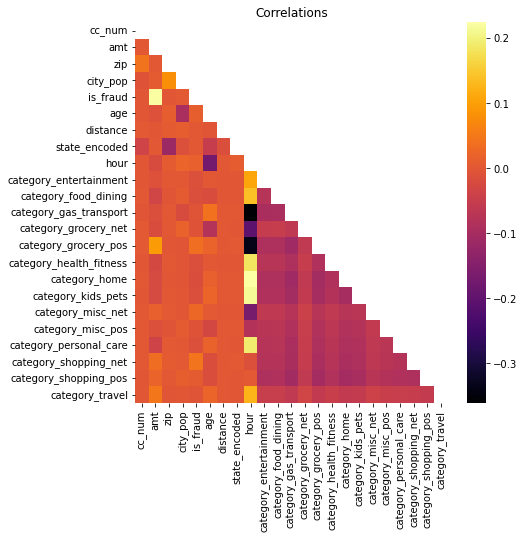

In [156]:
#finding the correlations and plotting them on a heatmap to see what might be good indicators
corrs = data.corr()

#setting size
fig, ax = plt.subplots(figsize=(7,7))
# creating mask
mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(corrs, cmap='inferno', ax=ax, mask=mask).set_title("Correlations")

### scaling / normalising

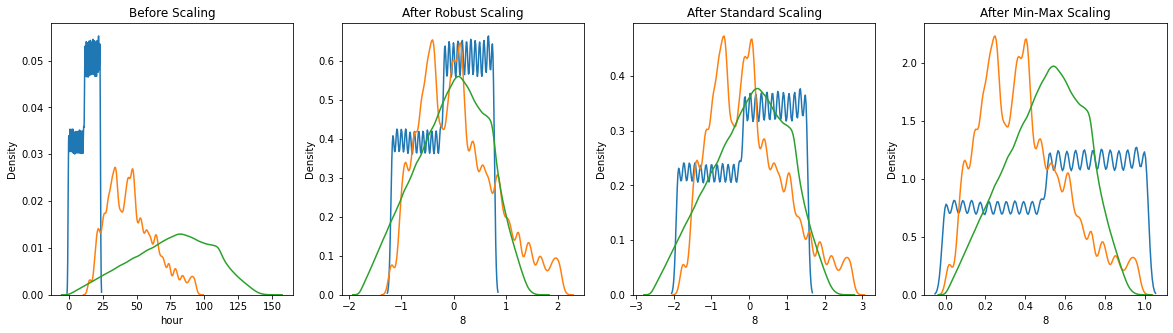

In [34]:
#deciding which scaler to use
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

#making copy
df = data.copy()

#making the scalers
scalerR = RobustScaler()
robust_df = scalerR.fit_transform(df)
robust_df = pd.DataFrame(robust_df)
  
scalerS = StandardScaler()
standard_df = scalerS.fit_transform(df)
standard_df = pd.DataFrame(standard_df)
  
scalerM = MinMaxScaler()
minmax_df = scalerM.fit_transform(df)
minmax_df = pd.DataFrame(minmax_df)

# plotting
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['hour'], ax = ax1)
sns.kdeplot(df['age'], ax = ax1)
sns.kdeplot(df['distance'], ax = ax1)

ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[6], ax = ax2)

ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[6], ax = ax3)

ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[6], ax = ax4)

plt.show()

In [18]:
#applying chosen scaler
from sklearn.preprocessing import RobustScaler
# select columns to scale 
to_scale = [col for col in data.columns if data[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(data[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    data[col] = scaled[col]

In [ ]:
#if just for outliers could remove with this:

#Q1 = subsample.quantile(0.25)
#Q3 = subsample.quantile(0.75)
#IQR = Q3 - Q1
#df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [19]:
#imports

# import libraries needed for this step
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

import sklearn.neighbors
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm # estimates statistical models
from sklearn.feature_selection import RFE #Recursive Feature Elimination for feature selection

from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [25]:
#creating X and y and splitting data

X = data.drop(['is_fraud'],axis=1) 
y = data['is_fraud']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=9)
X_test.shape, X_test.shape, y_train.shape, y_test.shape

((427903, 22), (427903, 22), (868772,), (427903,))

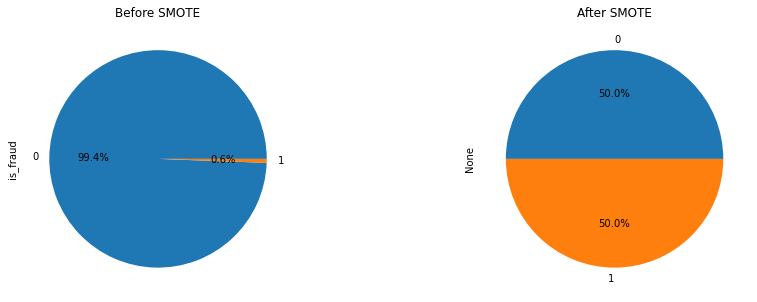

In [26]:
#applying and demonstarting SMOTE
smote = SMOTE()
X_train_new, y_train_new = smote.fit_resample(X_train, y_train.ravel())
X_test_new, y_test_new = smote.fit_resample(X_test, y_test.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
#could do manuel methed where randomly select equal number of fraud and not fraud etc etc

### modelling

In [27]:
# look for best describiing features for the logistic regression model using rfe
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)

#fitting
rfe = rfe.fit(X_train_new, y_train_new)
logreg.fit(X_train_new, y_train_new)

#making predictions
y_test_pred = logreg.predict(X_test_new)


In [28]:
# have a look on the list of features and the ranking they gets 
list(zip(X_train_new.columns, rfe.support_, rfe.ranking_))

[('cc_num', False, 8),
 ('amt', True, 1),
 ('zip', False, 4),
 ('city_pop', False, 7),
 ('age', False, 6),
 ('distance', False, 5),
 ('state_encoded', False, 3),
 ('hour', False, 2),
 ('category_entertainment', True, 1),
 ('category_food_dining', True, 1),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', True, 1),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', True, 1),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1)]

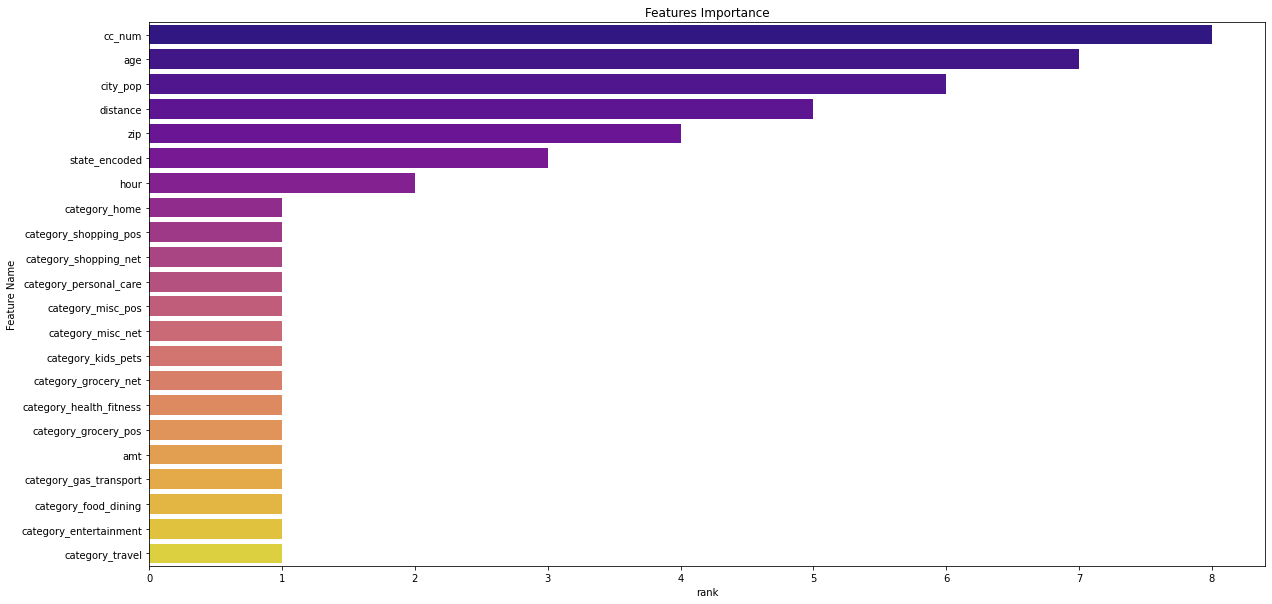

In [24]:
#plotting 
feat_imp = pd.DataFrame(list(zip(X_train_new.columns, rfe.support_, rfe.ranking_)), columns=['variables','selected','rank'])
feat_imp = feat_imp.set_index('variables')

plt.figure(figsize=[20,10])
plt.title('Features Importance')
sns.barplot(x='rank', y=feat_imp.index.values, data=feat_imp, 
            order=feat_imp.sort_values(by='rank', ascending=False).index.values, palette='plasma', )
plt.ylabel('Feature Name');

In [89]:
#method for getting the models
def get_models(): 
    models, names = list(), list()
    #LogReg
    models.append(LogisticRegression())
    names.append('LogReg')
    # DTC
    models.append(DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0))
    names.append('DTC')
    # Bagging 
    models.append(BaggingClassifier(n_estimators=100))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators = 100,max_depth = 20,verbose = 1))
    names.append('RF')
    # XGB 
    models.append(XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3))
    names.append('XGB')
    return models, names

#test
get_models()

([LogisticRegression(),
  DecisionTreeClassifier(max_depth=20, random_state=0),
  BaggingClassifier(n_estimators=100),
  RandomForestClassifier(max_depth=20, verbose=1),
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.1, max_delta_step=None, max_depth=3,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=None, subsample=None,
                tree_method=None, validate_parameters=None, verbosity=None)],
 ['LogReg', 'DTC', 'BAG', 'RF', 'XGB'])

In [90]:
# method to evaluate each model 
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

#test with XGB
evaluate_model(X_test_new, y_test_new, XGBClassifier())

array([0.99994602, 0.99995217, 0.99996853, 0.99996754, 0.99995901,
       0.99997042, 0.9999579 , 0.9999498 , 0.99995572, 0.99995464,
       0.99997429, 0.99996034, 0.99997178, 0.99996506, 0.99996859,
       0.99995553, 0.99994393, 0.99995231, 0.99995873, 0.99996099,
       0.99997756, 0.9999521 , 0.99995198, 0.99996122, 0.99997328,
       0.99996276, 0.99996162, 0.99996352, 0.9999531 , 0.99995214])

In [91]:

#getting scores mean and standard deviation
models, names = get_models()
results = list()

for i in range(len(models)):
    #fit models
    models[i].fit(X_train_new, y_train_new)
    # evaluate the model and store results
    scores = evaluate_model(X_test_new, y_test_new, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LogReg 0.919 (0.005)
>DTC 0.997 (0.000)
>BAG 1.000 (0.000)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.2min finished


>RF 1.000 (0.000)
[19:17:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>XGB 0.994 (0.000)


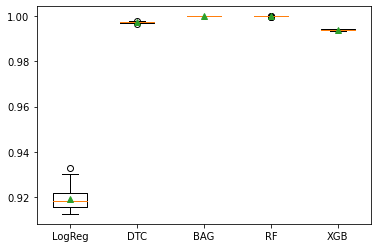

In [92]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [93]:
#alternative method 
from sklearn.metrics import roc_curve, roc_auc_score

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for i in models:
    model = i.fit(X_train_new, y_train_new)
    yproba = model.predict_proba(X_test_new)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_new,  yproba)
    auc = roc_auc_score(y_test_new, yproba)
    
    result_table = result_table.append({'classifiers':i.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.6s finished


[20:23:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


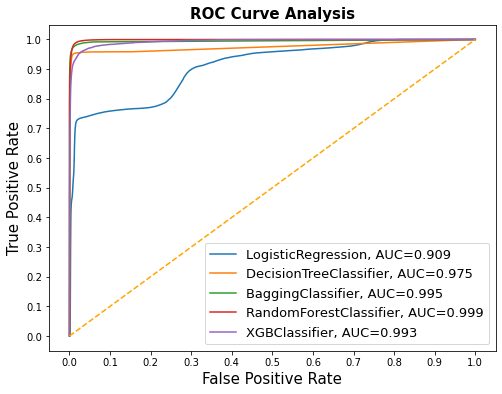

In [94]:
#plotting the results

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [95]:
#GridSearch to find best params for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid ={'n_estimators': [50, 100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 'None']}
grid_cv = GridSearchCV(RandomForestClassifier(), param_grid)
grid_cv.fit(X_train_new, y_train_new)
print(grid_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 19.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   24.1s finished


Text(33.0, 0.5, 'Actual')

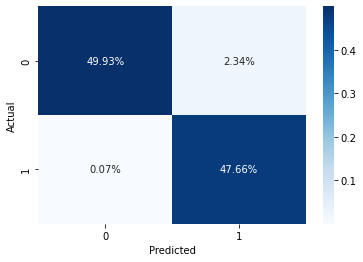

In [96]:
#confusion matrix of best model
model = RandomForestClassifier(n_estimators = 200,max_depth = 30,verbose = 1, criterion='entropy')
model.fit(X_train_new, y_train_new)
predictions = model.predict(X_test_new)

cfm = confusion_matrix(predictions, y_test_new)

#plotting heatmap of confusion matrix showing percentages
sns.heatmap(cfm/np.sum(cfm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [97]:
print('confusion matrix : \n', cfm)
print(classification_report(y_test_new, predictions))

confusion matrix : 
 [[424872  19881]
 [   595 405586]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    425467
           1       1.00      0.95      0.98    425467

    accuracy                           0.98    850934
   macro avg       0.98      0.98      0.98    850934
weighted avg       0.98      0.98      0.98    850934



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   24.1s finished


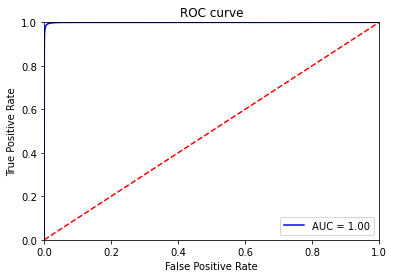

In [98]:
#plotting the ROC curve of final model

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test_new)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_new, preds)
roc_auc = metrics.auc(fpr, tpr)

# plotting
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
#plotting test with random params
rf = RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(X, y)

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rf.estimators_[50], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph